# Analyse exploratoire

In [2]:
# Import des librairies nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly
from PIL import ImageColor

Import du dataset sauvegardé après nettoyage et imputation

In [3]:
df_clean=pd.read_csv('df_clean.csv',low_memory=False)

Définition des couleurs équivalentes aux 5 nutriscores

In [4]:
palette_nutrigrade=["#008a4b", "#7fc241","#feca07","#f58221","#ef3e23"]
palette_nova=["#008a4b", "#7fc241","#f58221","#ef3e23"]

### Produits par catégories

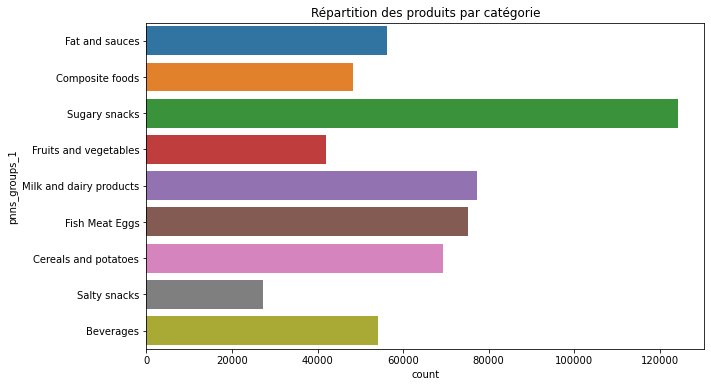

In [4]:
# définition des données : on enlève la catégorie 'unknown'
data=df_clean[~(df_clean['pnns_groups_1']=='unknown')]
plt.figure(figsize=(10,6))
sns.countplot(data=data,y='pnns_groups_1',palette='tab10').set_title('Répartition des produits par catégorie');

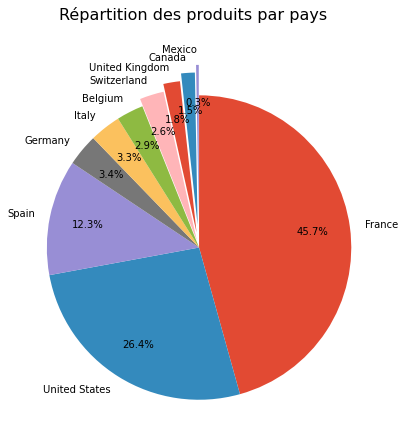

In [5]:
# définition des données : Comptage des produits par pays. On garde les 10 plus importants
top_countries=df_clean['countries'].value_counts()
top_countries=top_countries[~top_countries.index.str.contains(',')].nlargest(10)

# Affichage du pie chart
plt.style.use('ggplot')
fig,ax=plt.subplots(figsize=(7,7))
explode=[0,0,0,0,0,0,0.05,0.1,0.15,0.2]
ax.pie(top_countries,labels=top_countries.index,startangle=90,counterclock=False,explode=explode,autopct='%1.1f%%',pctdistance=0.75)
fig.suptitle('Répartition des produits par pays',fontsize=16)
plt.show()

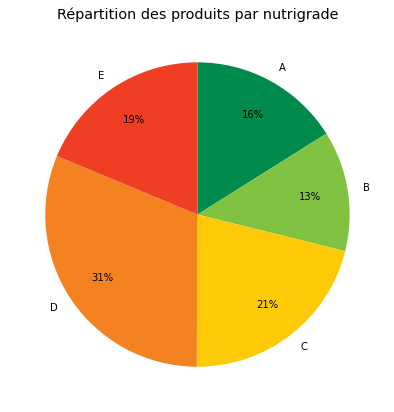

In [6]:
# Définition des données
nutrigrade_count=df_clean['nutriscore_grade'].value_counts().reindex(index=['A','B','C','D','E'])

# Affichage du pie chart
fig,ax=plt.subplots(figsize=(7,7))
ax.pie(nutrigrade_count,labels=nutrigrade_count.index,startangle=90,counterclock=False,autopct='%1.0f%%',pctdistance=0.75,colors=palette_nutrigrade)
ax.set_title('Répartition des produits par nutrigrade')
plt.style.use('ggplot')
plt.show()

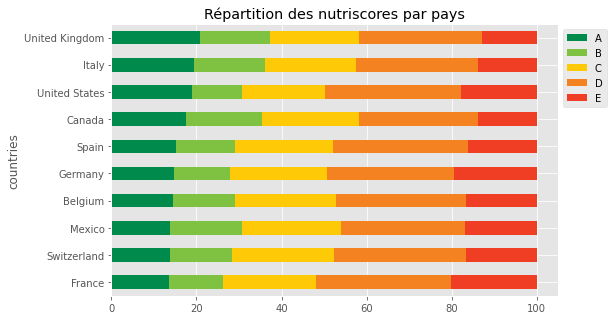

In [7]:
# Définition des données
df_test=df_clean[['countries','nutriscore_grade']][df_clean['countries'].isin(top_countries.index)]
df_test=pd.pivot_table(df_test,index='countries',columns='nutriscore_grade',aggfunc=np.size)
df_test=(df_test.div(df_test.sum(axis=1),axis=0)*100).sort_values('A')

# Affichage du graphe
df_test.plot(kind='barh',stacked=True,color=palette_nutrigrade,figsize=(8,5),title='Répartition des nutriscores par pays')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

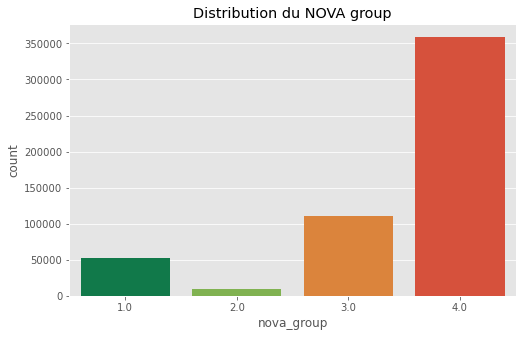

In [10]:
fig,ax=plt.subplots(figsize=(8,5))
data=pd.DataFrame(df_clean['nova_group'].value_counts(sort=False)).reset_index()
data.columns=["nova_group",'count']
sns.barplot(data=data,x='nova_group',y='count',palette=palette_nova);
plt.title('Distribution du NOVA group');

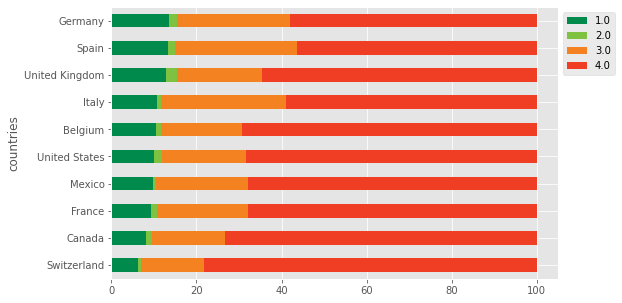

In [11]:
df_test=df_clean[['countries','nova_group']][df_clean['countries'].isin(top_countries.index)]
df_test=pd.pivot_table(df_test,index='countries',columns='nova_group',aggfunc=np.size)
df_test=(df_test.div(df_test.sum(axis=1),axis=0)*100).sort_values(1.0)
df_test.plot(kind='barh',stacked=True,color=palette_nova,legend='reverse',figsize=(8,5))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Histogrammes de certaines valeurs nutritionnelles

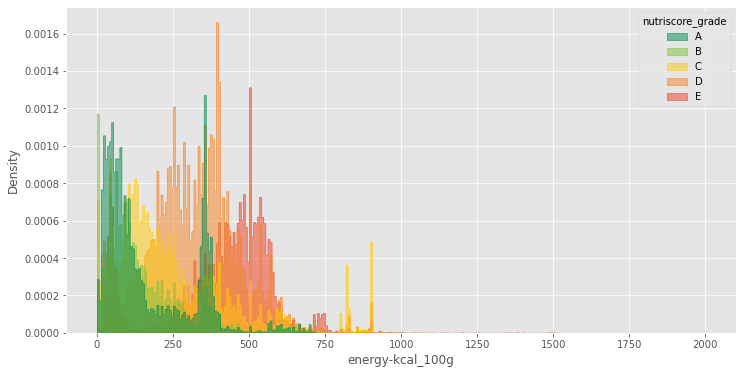

In [12]:
fig,ax=plt.subplots(figsize=(12,6))
sns.histplot(data=df_clean, x='energy-kcal_100g',hue='nutriscore_grade',hue_order=['A','B','C','D','E'],palette=palette_nutrigrade,element='step',stat='density',alpha=0.5);

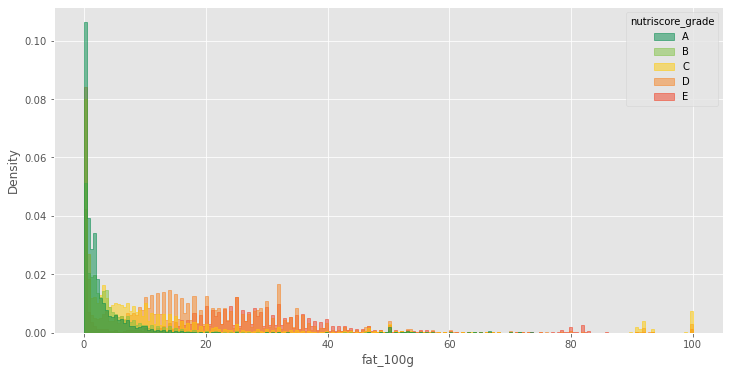

In [13]:
fig,ax=plt.subplots(figsize=(12,6))
sns.histplot(data=df_clean, x='fat_100g',hue='nutriscore_grade',hue_order=['A','B','C','D','E'],palette=palette_nutrigrade,element='step',stat='density',alpha=0.5);

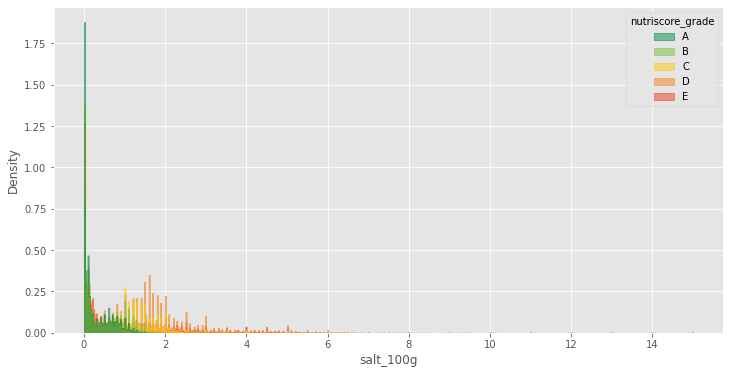

In [14]:
fig,ax=plt.subplots(figsize=(12,6))
data=df_clean[~(df_clean['salt_100g']>15)]
sns.histplot(data=data, x='salt_100g',hue='nutriscore_grade',hue_order=['A','B','C','D','E'],palette=palette_nutrigrade,element='step',stat='density',alpha=0.5);

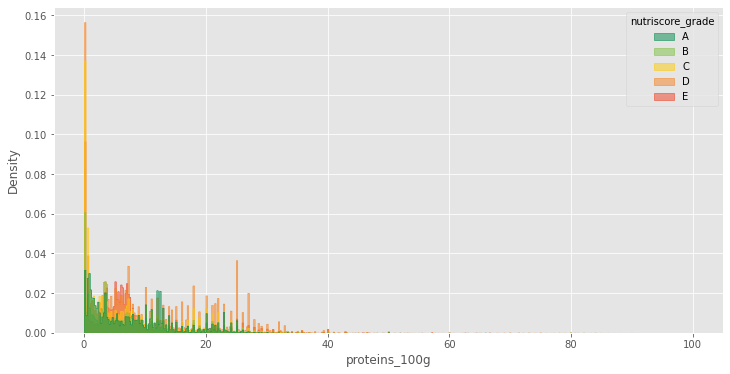

In [15]:
fig,ax=plt.subplots(figsize=(12,6))
data=df_clean[df_clean['proteins_100g']>50]
sns.histplot(data=df_clean, x='proteins_100g',hue='nutriscore_grade',hue_order=['A','B','C','D','E'],palette=palette_nutrigrade,element='step',stat='density',alpha=0.5);

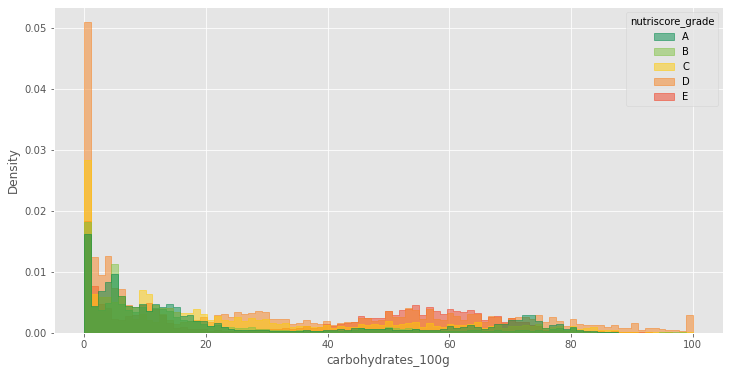

In [16]:
fig,ax=plt.subplots(figsize=(12,6))
sns.histplot(data=df_clean, x='carbohydrates_100g',hue='nutriscore_grade',hue_order=['A','B','C','D','E'],palette=palette_nutrigrade,element='step',stat='density',alpha=0.5);

### Pairplot pour toutes les valeurs nutritionnelles

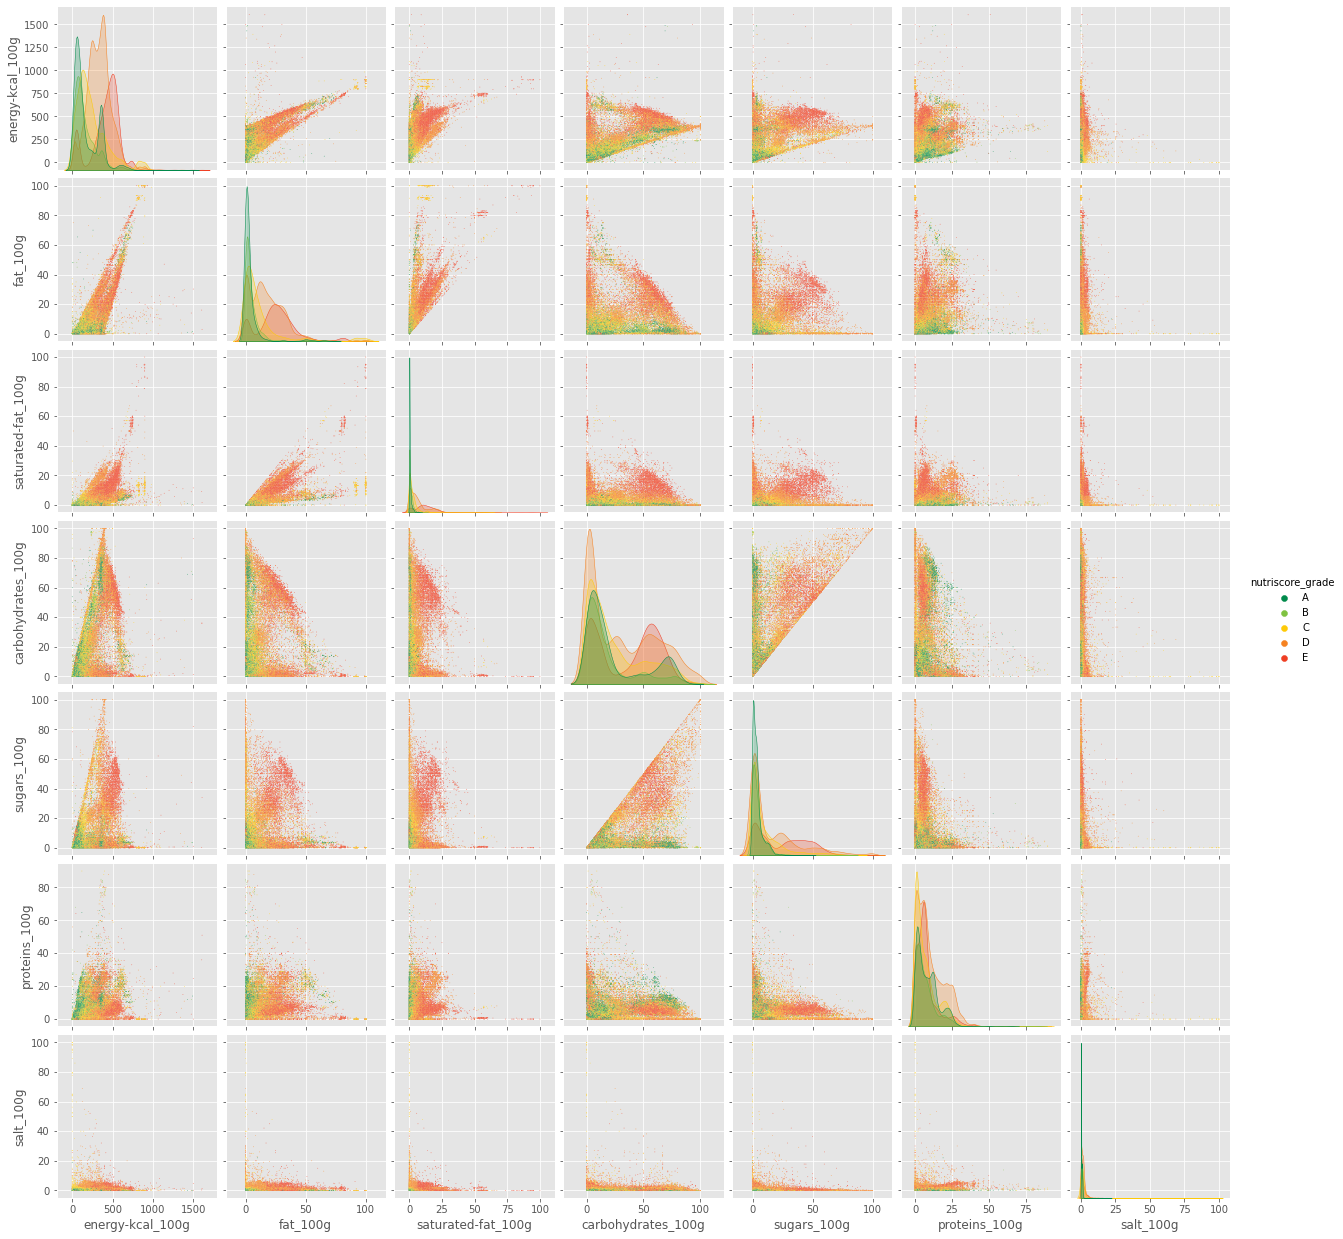

In [17]:
data=df_clean[['nutriscore_grade','energy-kcal_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g']].dropna(subset=['nutriscore_grade'])
data=data.sample(frac=0.05)
sns.pairplot(data=data,hue='nutriscore_grade',hue_order=['A','B','C','D','E'],palette=palette_nutrigrade,plot_kws={"s": 0.5});

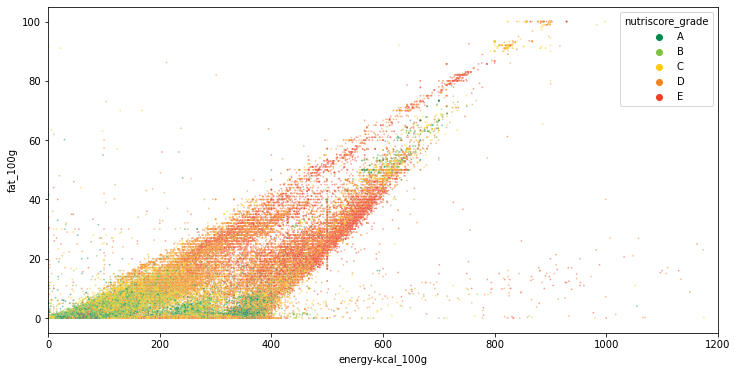

In [19]:
fig,ax=plt.subplots(figsize=(12,6))
data=df_clean.sample(frac=0.1)
sns.scatterplot(data=data, x='energy-kcal_100g',y='fat_100g',hue='nutriscore_grade',hue_order=['A','B','C','D','E'],palette=palette_nutrigrade,alpha=0.5, s= 3);
plt.xlim([0,1200]);

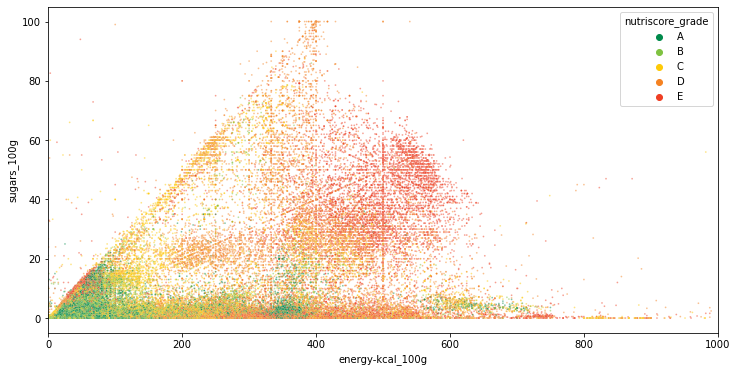

In [18]:
fig,ax=plt.subplots(figsize=(12,6))
data=df_clean.sample(frac=0.1)
sns.scatterplot(data=data, x='energy-kcal_100g',y='sugars_100g',hue='nutriscore_grade',hue_order=['A','B','C','D','E'],palette=palette_nutrigrade,alpha=0.5, s= 3);
plt.xlim([0,1000]);

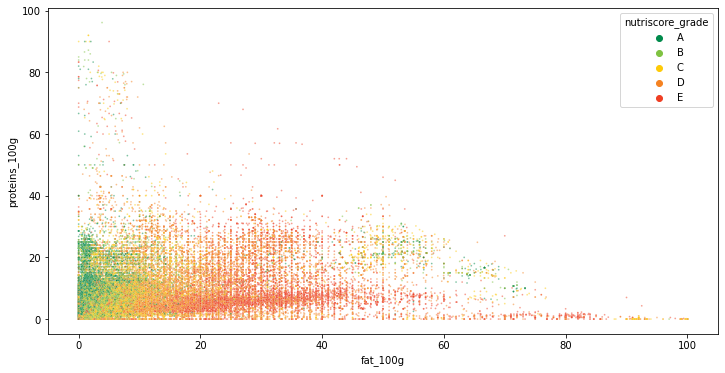

In [21]:
fig,ax=plt.subplots(figsize=(12,6))
data=df_clean.sample(frac=0.1)
sns.scatterplot(data=data, x='fat_100g',y='proteins_100g',hue='nutriscore_grade',hue_order=['A','B','C','D','E'],palette=palette_nutrigrade,alpha=0.5, s= 3);
#plt.xlim([0,1000]);

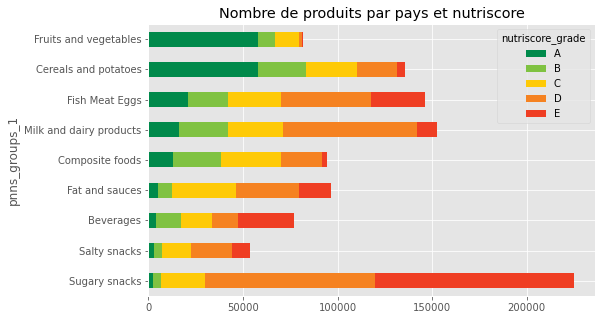

In [18]:
# Définition des données
data=df_clean[['pnns_groups_1','nutriscore_grade']]
data=data[~(data['pnns_groups_1']=='unknown')]
data=pd.pivot_table(data,index='pnns_groups_1',columns='nutriscore_grade',aggfunc=np.size).sort_values('A')

# Affichage du graphe
data.plot(kind='barh',stacked=True,color=palette_nutrigrade,figsize=(8,5),title='Nombre de produits par pays et nutriscore')
plt.show()

In [19]:
def product_chart(product):
    
    '''Fonction retournant la répartition des nutrigrades pour l'ensemble des produits contenant un mot clé 
    (sous forme de pie chart).
    Possibilité d'afficher le pairplot également (ligne en commentaires actuellement) '''
    
    # Définition des données
    data_product=df_clean[df_clean['product_name'].str.contains(product).replace(np.nan,False)]
    pie_data=data_product['nutriscore_grade'].value_counts().reindex(index=['A','B','C','D','E'])
    pairplot_data=data_product[['nutriscore_grade','energy-kcal_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g']].dropna(subset=['nutriscore_grade'])
    
    # Affichage des graphes
    fig,ax=plt.subplots(figsize=(7,7))
    plt.style.use('ggplot')
    ax.pie(pie_data,labels=pie_data.index,startangle=90,counterclock=False,autopct='%1.0f%%',pctdistance=0.75,colors=palette_nutrigrade)
    ax.set_title('Répartition des produits contenant ' + product + ' par nutrigrade \n Nb de produits : ' + str(len(data_product))  ,{'fontsize':12})
    #sns.pairplot(data=pairplot_data,hue='nutriscore_grade',hue_order=['A','B','C','D','E'],palette=palette_nutrigrade,plot_kws={"s": 15});
    plt.show()

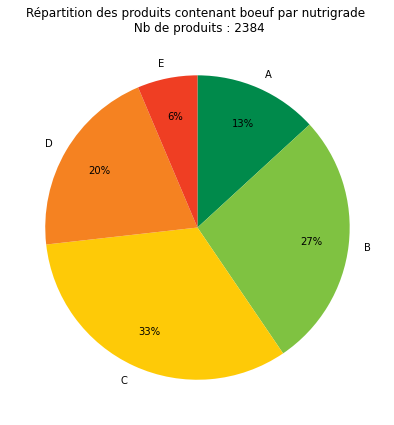

In [20]:
# Exemple avec le mot 'boeuf'
product_chart('boeuf')

#### Diagramme de Sankey (Répartition catégories / nutriscore)

In [21]:
# Définition des données
data_group=pd.pivot_table(df_clean[['nutriscore_grade','pnns_groups_1']],index='nutriscore_grade',columns='pnns_groups_1',aggfunc=np.size)
data_group=data_group.drop('unknown',axis=1)

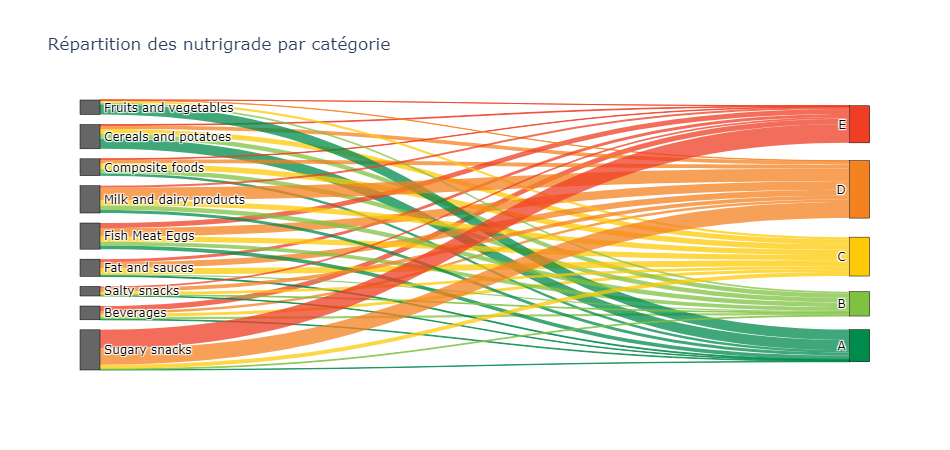

In [22]:
# Définition et affichage du graphe

import plotly.graph_objects as go
from PIL import ImageColor

value=[]
label=[]
for col in data_group.columns.tolist():
    for idx in data_group.index.tolist():
        value.append(data_group.loc[idx,col])
        
color=len(data_group.columns.tolist())*palette_nutrigrade
color=[ImageColor.getcolor(color, "RGBA") for color in color]
color_rgba=[]
for idx in color:
    idx=list(idx)
    idx[3]=0.75
    idx=tuple(idx)
    color_rgba.append(idx)
color_rgba=['rgba'+str(color) for color in color_rgba]

for i in data_group.columns.tolist():
    label.append(i)
for i in data_group.index.tolist():
    label.append(i)

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 10,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = label,
      color = ["#666666","#666666","#666666","#666666","#666666","#666666","#666666","#666666","#666666","#008a4b", "#7fc241","#feca07","#f58221","#ef3e23"],
      x = [0,0,0,0,0,0, 0, 0, 0,0.987,0.987,0.987,0.987,0.987],
      y = [0,0,0,0,0,0, 0, 0, 0,0.91,0.755,0.58,.331,0.09],
    ),
    link = dict(
      source = [item for sublist in [len(data_group.index.tolist())*[i] for i in range(len(data_group.columns.tolist()))] for item in sublist], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = len(data_group.columns.tolist())*list(range(len(data_group.columns.tolist()),len(data_group.columns.tolist())+len(data_group.index.tolist()))),
      value = value,
        color=color_rgba
  ))])

fig.update_layout(title_text="Répartition des nutrigrade par catégorie", font_size=12)
fig.show()

#### Treemap (10 marques françaises)

In [23]:
# Définition des données
top_brands=df_clean[df_clean['countries']=='France']['brands'].value_counts().nlargest(10)
top_brands=df_clean[df_clean['brands'].isin(top_brands.index)][['brands','nutriscore_grade']].dropna(subset=['nutriscore_grade'])
data_brands=pd.pivot_table(top_brands,index='nutriscore_grade',columns='brands',aggfunc=np.size)

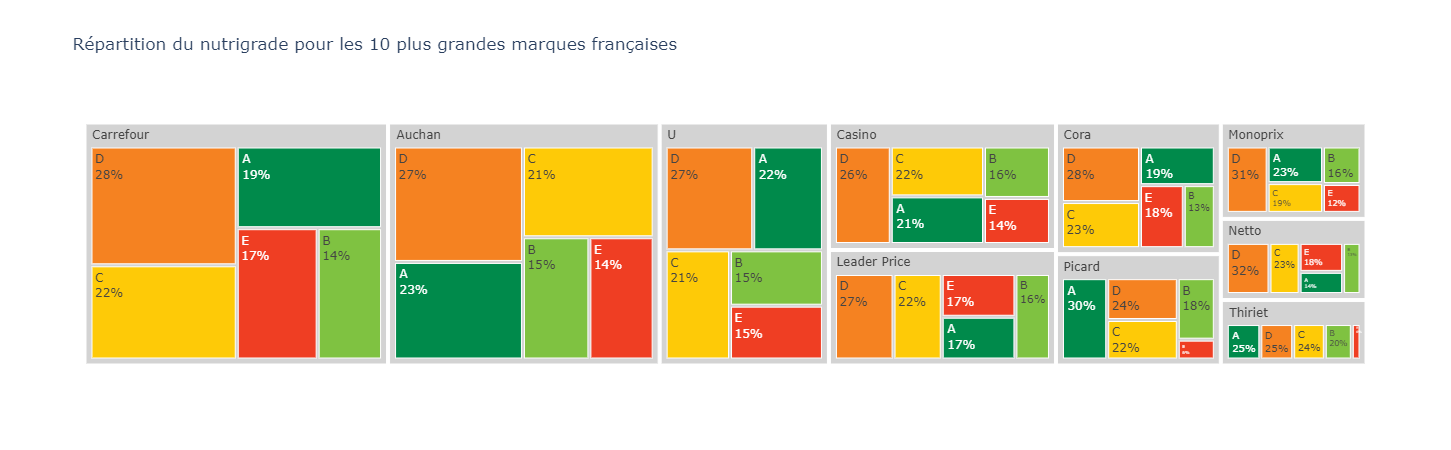

In [24]:
# Affichage du graphe
import plotly.express as px
fig = px.treemap(top_brands, path=['brands', 'nutriscore_grade'],color='nutriscore_grade',color_discrete_map={'(?)':'lightgrey','E':'#ef3e23', 'D':'#f58221', 'C':'#feca07','B':'#7fc241','A':'#008a4b'},
                 title='Répartition du nutrigrade pour les 10 plus grandes marques françaises')
fig.data[0].textinfo = 'label+text+percent parent'
fig.layout.hovermode = False
fig.show()

# ACP

In [25]:
# Import des librairies nécessaires
from sklearn import decomposition
from sklearn import preprocessing
from functions import *
import scipy

In [26]:
# Fonction affichant l'éboulis des valeurs propres pour une acp donnée
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

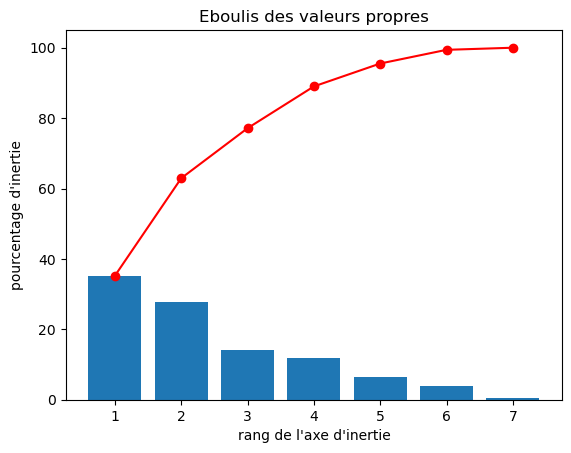

In [27]:
plt.style.use('default')

# choix du nombre de composantes à calculer
n_comp = 7

# selection des colonnes à prendre en compte dans l'ACP
df_acp = df_clean.dropna(subset=['nutriscore_grade'])
df_acp = df_acp[['energy-kcal_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g']]
df_acp=df_acp.sample(frac=0.5)

# préparation des données pour l'ACP
X = df_acp.values
nutri = df_acp.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
acp = decomposition.PCA(n_components=n_comp)
acp.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(acp)

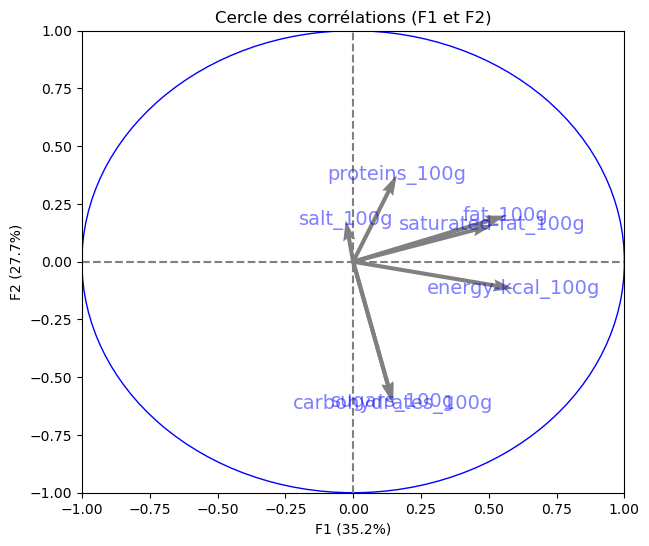

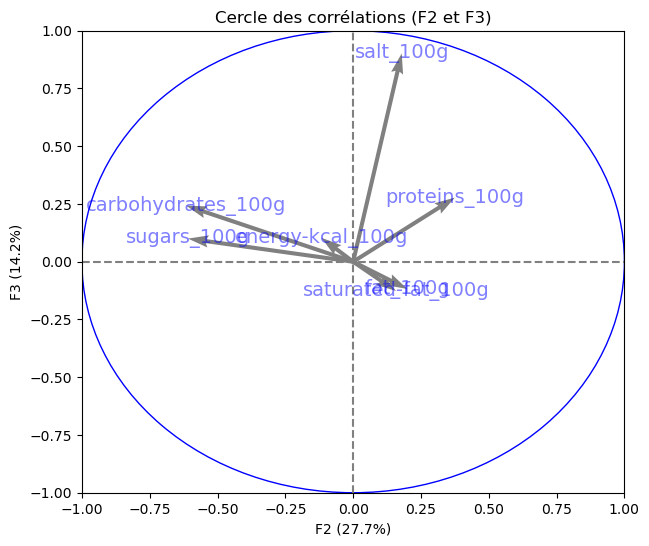

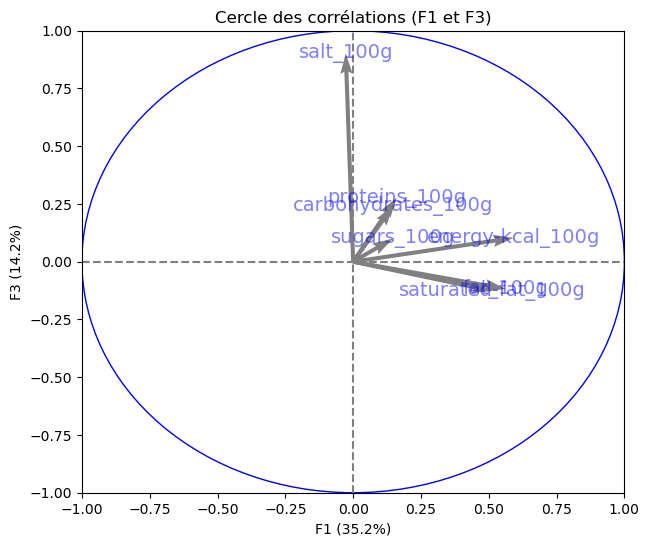

In [28]:
# Cercle des corrélations
pcs = acp.components_
display_circles(pcs, n_comp, acp, [(0,1),(1,2),(0,2)], labels = np.array(nutri))

In [29]:
# Fonction définissant l'affichage de la projection des individus sur les plans

def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, sample, labels=None, alpha=1, illustrative_var=None, palette=None, size=2):
    idx = np.random.randint(len(X_projected), size=sample)
    sample_proj = X_projected[idx,:]
    illustrative_var = np.array(illustrative_var)
    illustrative_var = illustrative_var[idx]
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))

            # affichage des points
            if illustrative_var is None:
                plt.scatter(sample_proj[:, d1],sample_proj[:, d2], alpha=alpha)
            else:
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)

                    if palette==None:
                        plt.scatter(sample_proj[selected, d1], sample_proj[selected, d2], alpha=alpha, label=value, s=size)
                    else:
                        plt.scatter(sample_proj[selected, d1], sample_proj[selected, d2], alpha=alpha, label=value, c=palette[np.unique(illustrative_var).tolist().index(value)], s=size)
                lgnd = plt.legend(fontsize = 10,bbox_to_anchor=(1,1))
                for value in np.unique(illustrative_var):
                    lgnd.legendHandles[np.unique(illustrative_var).tolist().index(value)]._sizes = [24]

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(sample_proj[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(sample_proj[:, [d1,d2]])) * 1.1
            plt.xlim([-5,5])
            plt.ylim([-5,5])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))

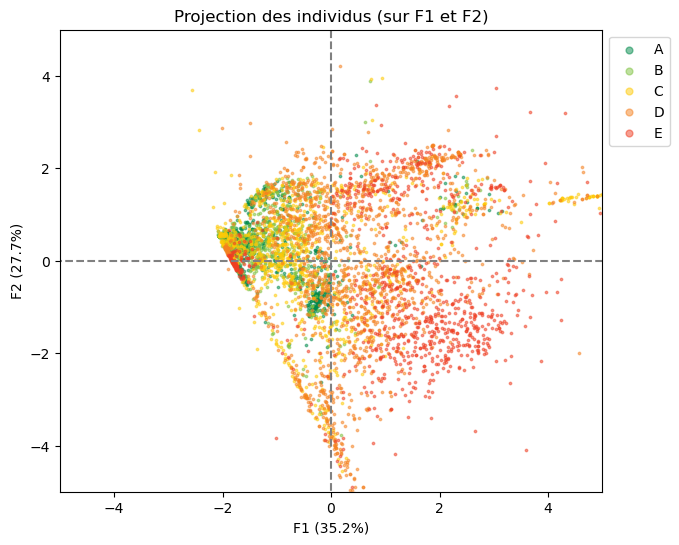

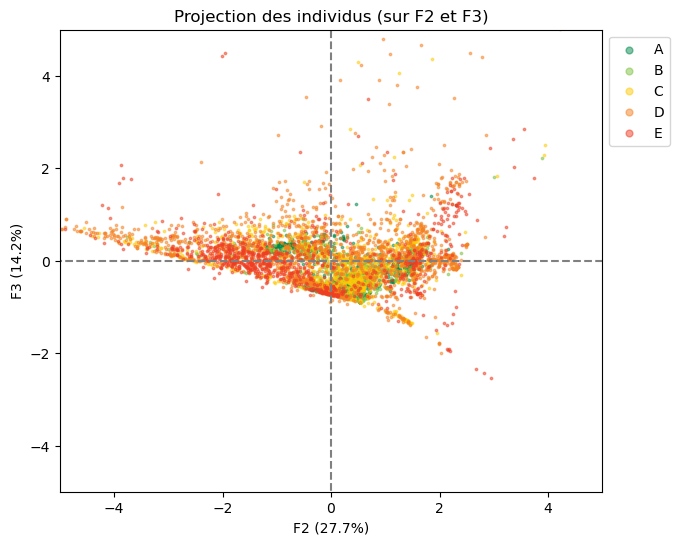

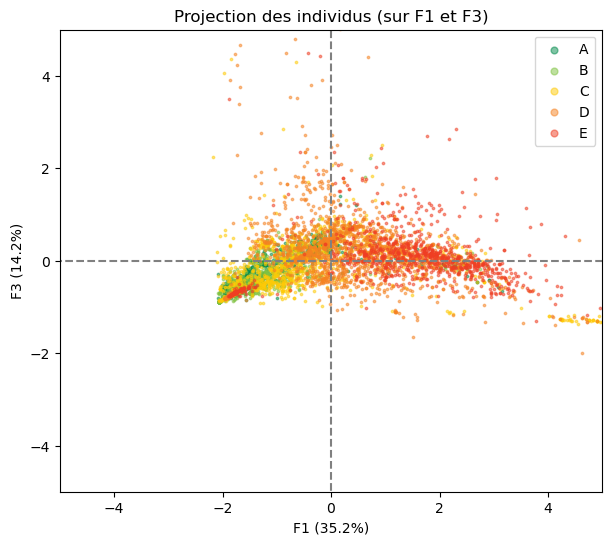

In [30]:
# Projection des individus
nutrigrade = [df_clean.loc[idx, "nutriscore_grade"] for idx in df_acp.index]
X_projected = acp.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, acp, [(0,1),(1,2),(0,2)],sample=5000, illustrative_var = nutrigrade, palette=palette_nutrigrade, alpha=0.5, size = 3)

# Test de Kruskal Wallis

In [31]:
# Préparation des données pour le test statistique
nutri=['energy-kcal_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g']

sample_A = df_clean[df_clean['nutriscore_grade']=='A']
sample_B = df_clean[df_clean['nutriscore_grade']=='B']
sample_C = df_clean[df_clean['nutriscore_grade']=='C']
sample_D = df_clean[df_clean['nutriscore_grade']=='D']
sample_E = df_clean[df_clean['nutriscore_grade']=='E']

test statistique pour les 5 échantillons

In [32]:
# Affichage de la p-value pour chaque variable
for variable_test in nutri:
    print('\nTest de Kruskal-Wallis pour',variable_test)
    kw=scipy.stats.kruskal(sample_A[variable_test], sample_B[variable_test], sample_C[variable_test], sample_D[variable_test],sample_E[variable_test])
    print('p-value =',kw[1])


Test de Kruskal-Wallis pour energy-kcal_100g
p-value = 0.0

Test de Kruskal-Wallis pour fat_100g
p-value = 0.0

Test de Kruskal-Wallis pour saturated-fat_100g
p-value = 0.0

Test de Kruskal-Wallis pour carbohydrates_100g
p-value = 0.0

Test de Kruskal-Wallis pour sugars_100g
p-value = 0.0

Test de Kruskal-Wallis pour proteins_100g
p-value = 0.0

Test de Kruskal-Wallis pour salt_100g
p-value = 0.0


Test statistique sur chaque couple d'échantillons pour chaque variable

In [33]:
samples=[sample_A,sample_B,sample_C,sample_D,sample_E]
grade = ['A','B','C','D','E']
for variable_test in nutri:
    print('\nTest de Kruskal-Wallis pour',variable_test)
    for n in range(len(samples)):
        for i in range(n+1, len(samples)):
            kw=scipy.stats.kruskal(samples[n][variable_test], samples[i][variable_test])
            print('Grade '+grade[n]+' et grade '+grade[i]+' : p-value =',kw[1])


Test de Kruskal-Wallis pour energy-kcal_100g
Grade A et grade B : p-value = 0.0025073041190376687
Grade A et grade C : p-value = 0.0
Grade A et grade D : p-value = 0.0
Grade A et grade E : p-value = 0.0
Grade B et grade C : p-value = 0.0
Grade B et grade D : p-value = 0.0
Grade B et grade E : p-value = 0.0
Grade C et grade D : p-value = 0.0
Grade C et grade E : p-value = 0.0
Grade D et grade E : p-value = 0.0

Test de Kruskal-Wallis pour fat_100g
Grade A et grade B : p-value = 0.0
Grade A et grade C : p-value = 0.0
Grade A et grade D : p-value = 0.0
Grade A et grade E : p-value = 0.0
Grade B et grade C : p-value = 0.0
Grade B et grade D : p-value = 0.0
Grade B et grade E : p-value = 0.0
Grade C et grade D : p-value = 0.0
Grade C et grade E : p-value = 0.0
Grade D et grade E : p-value = 0.0

Test de Kruskal-Wallis pour saturated-fat_100g
Grade A et grade B : p-value = 0.0
Grade A et grade C : p-value = 0.0
Grade A et grade D : p-value = 0.0
Grade A et grade E : p-value = 0.0
Grade B et